In [1]:
import sys 
print(sys.path)

['c:\\Users\\Magnus\\Desktop\\PFFE\\Exam', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2032.0_x64__qbz5n2kfra8p0', '', 'C:\\Users\\Magnus\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages', 'C:\\Users\\Magnus\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\win32', 'C:\\Users\\Magnus\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\Magnus\\AppData\\Local\\P

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import scipy
from scipy import stats
from scipy import optimize
from scipy.optimize import minimize

from typing import NoReturn, Union, List, Callable, Tuple

import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
from codelibvisualizationlayout import default_colors
from matplotlib.ticker import FuncFormatter
from numpy import ndarray
import seaborn as sns

In [4]:
import codelibstatisticscovariance
import codelibvisualizationlayout
import codelibportfoliooptimizationriskmetrics
import codelibvisualizationbase
import codelibportfoliooptimizationmeanvariance
import codelibportfoliooptimizationriskbudget
import codelibstatisticshistoricalprobabilities
import codelibstatisticsmoments

In [6]:
num_assets = 2

df_list = list()

for i in range(num_assets):   
    asset_name = 'asset_{}'.format(i + 1)
    df  =  pd.read_excel(asset_name + ".xlsx", index_col=0)
    df.columns = ['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5']
    df['Asset'] = i + 1
    
    df_list.append(df)
    
df_asset_data = pd.concat(df_list)

asset_dict = dict()

for i in range(num_assets):   
    asset_name = 'asset_{}'.format(i + 1)
    asset_dict[asset_name] = pd.read_excel(asset_name + ".xlsx", index_col=0).values

prices = np.empty((10000, 6, 2)) # num_sim x num_per x num_assets
for i, vals in enumerate(list(asset_dict.values())):
    prices[:, :, i] = vals

df_asset_data.groupby('Asset').agg(['mean', 'std', 'skew', stats.kurtosis]).loc[:, ['Year 1', 'Year 5']]

df_return_data = df_asset_data.copy()
df_return_data.iloc[:, :-1] = df_return_data.iloc[:, :-1] - 1.0
df_return_data.groupby('Asset').agg(['mean', 'std', 'skew', stats.kurtosis]).loc[:, ['Year 1', 'Year 5']]

C:\Users\Magnus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\groupby\generic.py:322: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)


Year 1                                  Year 5                      \
           mean       std      skew  kurtosis      mean       std      skew   
Asset                                                                         
1      0.030225  0.077757  0.197232 -0.023936  0.162630  0.193654  0.488930   
2      0.059453  0.158559  0.436431  0.283181  0.348417  0.465265  1.060737   

                 
       kurtosis  
Asset            
1      0.494842  
2      1.811622

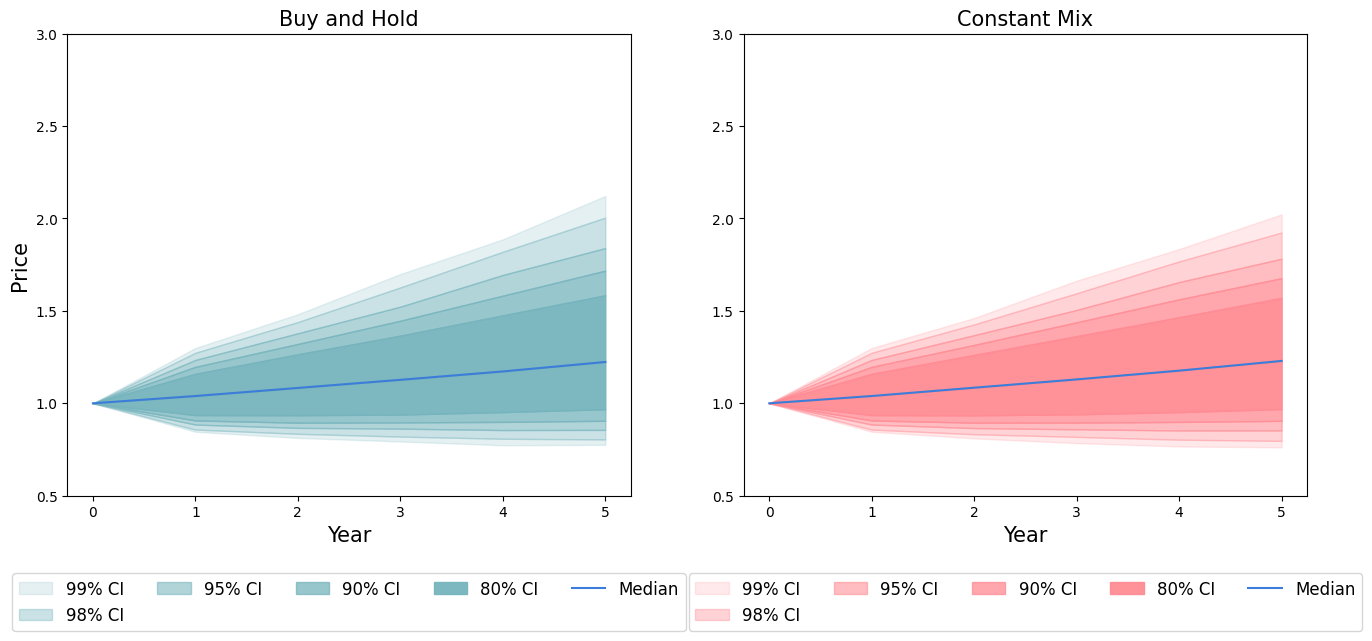

In [7]:
#Buy and hold portfolio
port_w = np.ones(num_assets) / num_assets

buy_and_hold_index = prices @ port_w

#Constant Mix Portfolio

def fan_chart(x: ndarray, y: ndarray, **kwargs) -> NoReturn:


    # defaults
    color_perc = "blue"
    color_median = "red"
    xlabel = None
    ylabel = None
    title = None
    labels = None
    initialize_fig = True

    if 'color' in kwargs:
        color_perc = kwargs['color']
    if 'color_median' in kwargs:
        color_median = kwargs['color_median']
    if 'xlabel' in kwargs:
        xlabel = kwargs['xlabel']
    if 'ylabel' in kwargs:
        ylabel = kwargs['ylabel']
    if 'title' in kwargs:
        title = kwargs['title']
    if 'labels' in kwargs:
        labels = True
        labels_to_plot = kwargs['labels']
    if "fig" in kwargs:
        fig = kwargs["fig"]
    if "ax" in kwargs:
        ax = kwargs["ax"]
        initialize_fig = False

    number_of_rows = y.shape[0]
    number_to_plot = number_of_rows // 2

    if labels is None:
        labels_to_plot = ["" for i in range(number_to_plot + number_of_rows % 2)]

    if initialize_fig:
        fig, ax = plt.subplots()

    for i in range(number_to_plot):

        # for plotting below
        values1 = y[i, :]
        values2 = y[i + 1, :]

        # for plotting above
        values3 = y[-2 - i, :]
        values4 = y[-1 - i, :]

        # calculate alpha
        alpha = 0.95 * (i + 1) / number_to_plot

        ax.fill_between(x, values1, values2, alpha=alpha, color=color_perc, label=labels_to_plot[i])
        ax.fill_between(x, values3, values4, alpha=alpha, color=color_perc)

    # plot center value with specific color
    if number_of_rows % 2 == 1:
        ax.plot(x, y[number_to_plot], color=color_median, label=labels_to_plot[-1])

    # add title
    plt.title(title)
    # add label to x axis
    plt.xlabel(xlabel)
    # add label to y axis
    plt.ylabel(ylabel)
    # legend
    if labels:
        ax.legend()



def correlation_plot(correlation_matrix: np.ndarray, names: Union[List[str], None] = None, **kwargs) -> None:


    # my_params = mpl.rcParams
    # sns.set(style="white")

    mask_upper_diagonal = True
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    vmax = 1.0
    vmin = -1.0
    center = 0.0
    cbar_kws = {"shrink": .75}
    title = None
    include_diagonal = False
    include_values = False
    fmt = "d"
    size_scale = False

    if 'mask' in kwargs:
        mask_upper_diagonal = kwargs['mask']
    if 'cmap' in kwargs:
        cmap = kwargs['cmap']
    if 'vmin' in kwargs:
        vmin = kwargs['vmin']
    if 'center' in kwargs:
        center = kwargs['center']
    if 'vmax' in kwargs:
        vmax = kwargs['vmax']
    if 'title' in kwargs:
        title = kwargs['title']
    if 'cbar_kws' in kwargs:
        cbar_kws = kwargs['cbar_kws']
    if 'include_diagonal' in kwargs:
        include_diagonal = kwargs['include_diagonal']
    if 'include_values' in kwargs:
        include_values = kwargs['include_values']
    if 'size_scale' in kwargs:
        size_scale = kwargs['size_scale']

def calculate_period_returns(index: np.ndarray):
    
    # get size of matrix
    n = index.shape[1]

    # get matrix not lagged
    new_mat = index[:, 1:n]
    # get matrix lagged
    old_mat = index[:, 0:n-1]
    # get 1 + return
    periodtr = new_mat / old_mat
    
    return periodtr - 1
    

def calculate_constant_mix_index(index, weights):
    
    port_index = np.ones((index.shape[0], index.shape[1]))
    
    # calculate period returns on assets
    per_ret = calculate_period_returns(index)
    
    # calculate port. period return
    port_per_ret = per_ret @ weights
    
    # calculate port. index
    port_index[:, 1:] = np.cumprod(1 + port_per_ret, axis=1)
    
    return port_index

time_points = np.arange(6)
constant_mix_index = calculate_constant_mix_index(prices, port_w)

percentiles_buy_and_hold = np.percentile(buy_and_hold_index, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5],
                                         axis=0)

percentiles_constant_mix = np.percentile(constant_mix_index, [0.5, 1.0, 2.5, 5, 10, 50, 90, 95, 97.5, 99.0, 99.5],
                                         axis=0)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

fan_chart(time_points,
          percentiles_buy_and_hold,
          color=default_colors['cyan'],
          color_median=default_colors['dark_blue'],
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax=ax[0])

ax[0].set_xlabel("Year", size=15)
ax[0].set_ylabel("Price", size=15)
ax[0].set_title("Buy and Hold", size=15)
ax[0].set_ylim([0.5, 3.0])
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12);

fan_chart(time_points,
          percentiles_constant_mix,
          color=default_colors['red'],
          color_median=default_colors['dark_blue'],
          labels=['99% CI', '98% CI', '95% CI', '90% CI', '80% CI', 'Median'],
          ax=ax[1])

ax[1].set_xlabel("Year", size=15)
ax[1].set_title("Constant Mix", size=15)
ax[1].set_ylim([0.5, 3.0])
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12);

In [8]:
#Descriptive Statistics

df_bh = pd.DataFrame(data=buy_and_hold_index, columns=['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])
df_bh['Port'] = "Buy and Hold"

df_cm = pd.DataFrame(data=constant_mix_index, columns=['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4', 'Year 5'])
df_cm['Port'] = "Constant Mix"

df_port = pd.concat([df_bh, df_cm])
df_port

def weighted_percentile(x: np.ndarray, p: Union[float, np.ndarray], probs: Union[np.ndarray, None] = None, axis=0):

    x = np.asarray(x)
    ndim = x.ndim

    # make sure the probs are set
    if probs is None:
        if ndim == 1:
            probs = np.ones_like(x) / len(x)
        elif axis == 0:
            length = x.shape[0]
            probs = np.ones(length) / length
        elif axis == 1:
            length = x.shape[1]
            probs = np.ones(length) / length
        else:
            raise ValueError('probs cannot be set')

    if ndim == 1:

        # get sorted index
        index_sorted = np.argsort(x)

        # get sorted data (x)
        sorted_x = x[index_sorted]

        # sorted probs
        sorted_probs = probs[index_sorted]

        # get cumulated probs
        cum_sorted_probs = np.cumsum(sorted_probs)

        pn = (cum_sorted_probs - 0.5 * sorted_probs) / cum_sorted_probs[-1]

        return np.interp(p, pn, sorted_x, left=sorted_x[0], right=sorted_x[-1])

    else:

        return np.apply_along_axis(weighted_percentile, axis, x, p, probs)

def cond_value_at_risk(x, alpha=0.05, probs=None, axis=0):
    
    x = np.asarray(x)
    ndim = x.ndim

    # make sure the probs are set
    if probs is None:
        if ndim == 1:
            probs = np.ones_like(x) / len(x)
        elif axis == 0:
            length = x.shape[0]
            probs = np.ones(length) / length
        elif axis == 1:
            length = x.shape[1]
            probs = np.ones(length) / length
        else:
            raise ValueError('probs cannot be set')
    
    if ndim == 1: 
        
        perc = weighted_percentile(x, p=alpha, probs=probs)
        idx = np.less(x, perc)
        
        if np.sum(idx) == 0: # Just return the mean if all values are the same. 
            
            return np.mean(x)
        
        else:
            return np.average(x[idx], weights=probs[idx])
        
    else:
        return np.apply_along_axis(cond_value_at_risk, axis, x, p, probs)
    

var_5pct = lambda x: weighted_percentile(x, 0.05)

port_stat = df_port.groupby('Port').agg(['mean',
                                         'std',
                                         'skew',
                                         stats.kurtosis,
                                         var_5pct,
                                         cond_value_at_risk]).loc[:, ['Year 1', 'Year 5']]

port_stat.rename(columns={'<lambda_0>': 'VaR(5%)'}, inplace=True)
port_stat.rename(columns={'cond_value_at_risk': 'CVaR(5%)'}, inplace=True)

port_stat


C:\Users\Magnus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\groupby\generic.py:322: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)


Year 1                                                    \
                  mean       std      skew  kurtosis   VaR(5%)  CVaR(5%)   
Port                                                                       
Buy and Hold  1.044839  0.087944  0.318567  0.158186  0.907027  0.878168   
Constant Mix  1.044839  0.087944  0.318567  0.158186  0.907027  0.878168   

                Year 5                                                    
                  mean       std      skew  kurtosis   VaR(5%)  CVaR(5%)  
Port                                                                      
Buy and Hold  1.255523  0.251393  0.855817  1.297996  0.905378  0.844648  
Constant Mix  1.252636  0.238489  0.621363  0.631289  0.905165  0.841156

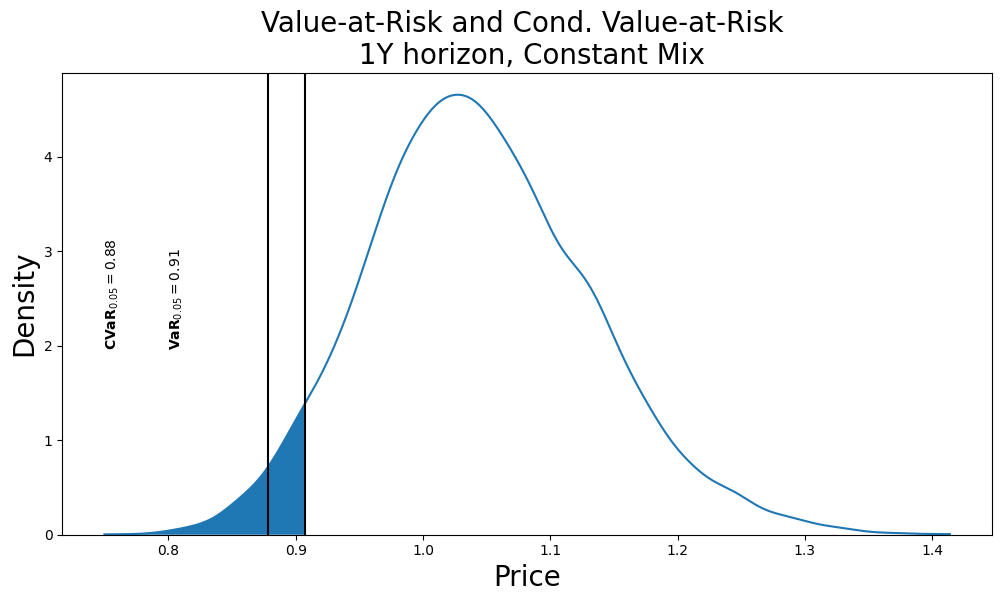

In [12]:
#1Y VaR and CVaR for constant mix portfolio

dist = constant_mix_index[:, 1]
kde = stats.gaussian_kde(dist)

fig, ax = plt.subplots(figsize=(12, 6))

# plot complete kde curve as line
pos = np.linspace(dist.min(), dist.max(), 1001)
ax.plot(pos, kde(pos))

# plot shaded kde
ax.fill_between(pos, kde(pos), where=pos<port_stat.loc['Constant Mix', 'Year 1']['VaR(5%)'])
ax.axvline(port_stat.loc['Constant Mix', 'Year 1']['VaR(5%)'], color="black")
ax.axvline(port_stat.loc['Constant Mix', 'Year 1']['CVaR(5%)'], color="black")

ax.set_title("Value-at-Risk and Cond. Value-at-Risk \n 1Y horizon, Constant Mix", size=20)
ax.set_xlabel('Price', size=20)
ax.set_ylabel('Density', size=20);

# add text
text_to_add =  "$\mathbf{VaR}_{0.05}" + " = {:,.2f}$".format(port_stat.loc['Constant Mix', 'Year 1']['VaR(5%)'])
ax.text(0.8, 2.0, text_to_add, rotation=90);

text_to_add_2 =  "$\mathbf{CVaR}_{0.05}" + " = {:,.2f}$".format(port_stat.loc['Constant Mix', 'Year 1']['CVaR(5%)'])
ax.text(0.750, 2.0, text_to_add_2, rotation=90);


ax.set_ylim(0,None);

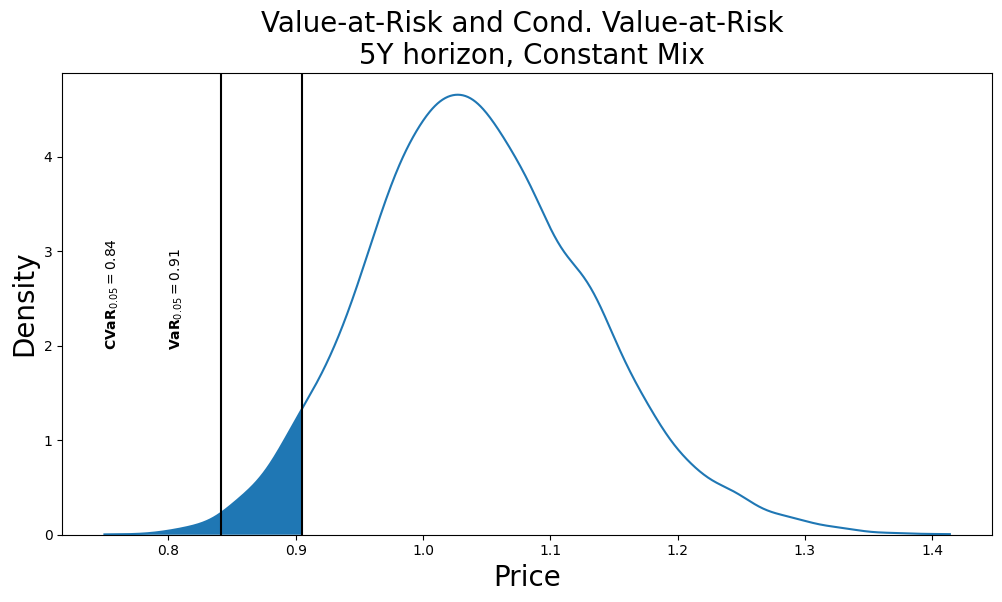

In [11]:
#5Y VaR and CVaR for constant mix portfolio

dist = constant_mix_index[:, 1]
kde = stats.gaussian_kde(dist)

fig, ax = plt.subplots(figsize=(12, 6))

# plot complete kde curve as line
pos = np.linspace(dist.min(), dist.max(), 1001)
ax.plot(pos, kde(pos))

# plot shaded kde
ax.fill_between(pos, kde(pos), where=pos<port_stat.loc['Constant Mix', 'Year 5']['VaR(5%)'])
ax.axvline(port_stat.loc['Constant Mix', 'Year 5']['VaR(5%)'], color="black")
ax.axvline(port_stat.loc['Constant Mix', 'Year 5']['CVaR(5%)'], color="black")

ax.set_title("Value-at-Risk and Cond. Value-at-Risk \n 5Y horizon, Constant Mix", size=20)
ax.set_xlabel('Price', size=20)
ax.set_ylabel('Density', size=20);

# add text
text_to_add =  "$\mathbf{VaR}_{0.05}" + " = {:,.2f}$".format(port_stat.loc['Constant Mix', 'Year 5']['VaR(5%)'])
ax.text(0.8, 2.0, text_to_add, rotation=90);

text_to_add_2 =  "$\mathbf{CVaR}_{0.05}" + " = {:,.2f}$".format(port_stat.loc['Constant Mix', 'Year 5']['CVaR(5%)'])
ax.text(0.750, 2.0, text_to_add_2, rotation=90);


ax.set_ylim(0,None);

In [13]:
#Portfolio Optimization 
"""
Define two numpy arrays with price information
"""

prices_1y = prices[:, 1]
prices_5y = prices[:, 5]

"""
Calculate covariance matrix
"""

cov_mat_1y = np.cov(prices_1y, rowvar=False)
cov_mat_5y = np.cov(prices_5y, rowvar=False)

"""
Check is 1Y covariance matrix is positive definite
"""

np.all(np.linalg.eigvals(cov_mat_1y) >= 0)

True

In [14]:
"""
Check is 5Y covariance matrix is positive definite
"""

np.all(np.linalg.eigvals(cov_mat_5y) >= 0)

True

In [15]:
def portfolio_variance(weights: np.ndarray, cov_mat: np.ndarray) -> float:

    return weights @ cov_mat @ weights

In [53]:
#1Y optimal weights, Buy-and-hold

#Define relevant constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

bounds = [(0.0, 1.0)] * 2
target_returns = np.arange(1.030225, 1.059543, 0.001) 

"""
Find optimal weights
"""

optimal_weights = list()
for target_return in target_returns:
    # define constraint 
    target_cons = {'type': 'eq',
                   'fun' : lambda x: np.average(prices_1y @ x) - target_return}


    x0 = np.ones(2) / 2
    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_1y,),
                                 method='SLSQP',
                                 constraints=[sum_to_one_cons, no_short_cons, target_cons], 
                                 options={'ftol': 1e-9, 'disp': True}, bounds=bounds)
    
    optimal_weights.append(res.x)
    
optimal_weights = np.array(optimal_weights)


Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.006046091529943795
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005660626508774004
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005348718951822924
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005110415017664619
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0049457147062982355
            Iterations: 2
            Func

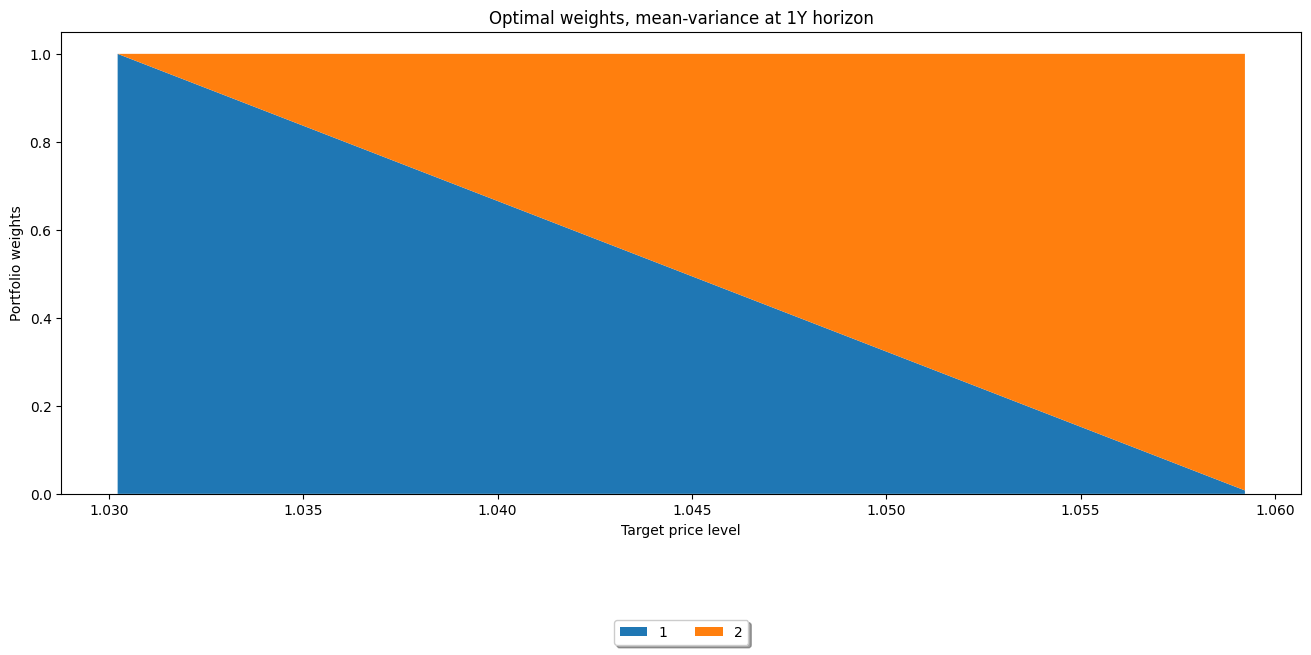

In [54]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.stackplot(target_returns, optimal_weights.T, labels=np.arange(1,3));
ax.set_xlabel("Target price level")
ax.set_ylabel("Portfolio weights")
ax.set_title("Optimal weights, mean-variance at 1Y horizon")
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5);

In [32]:
#5Y optimal weights, Buy-and-hold

"""
Define relevant constraints
"""
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

# alternatively use 
bounds = [(0.0, 1.0)] * 2

target_returns = np.arange(1.162630, 1.348417, 0.005) 
"""
Find optimal weights
"""

optimal_weights = list()
for target_return in target_returns:
    # define constraint 
    target_cons = {'type': 'eq',
                   'fun' : lambda x: np.average(prices_5y @ x) - target_return}


    x0 = np.ones(2) / 2
    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_5y,),
                                 method='SLSQP',
                                 constraints=[sum_to_one_cons, no_short_cons, target_cons], 
                                 options={'ftol': 1e-9, 'disp': True}, bounds=bounds)
    
    optimal_weights.append(res.x)
    
optimal_weights = np.array(optimal_weights)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.037501970650218146
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.035636474322451275
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03414058527449059
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03301430350633829
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03225762901799287
            Iterations: 3
            Function evaluatio

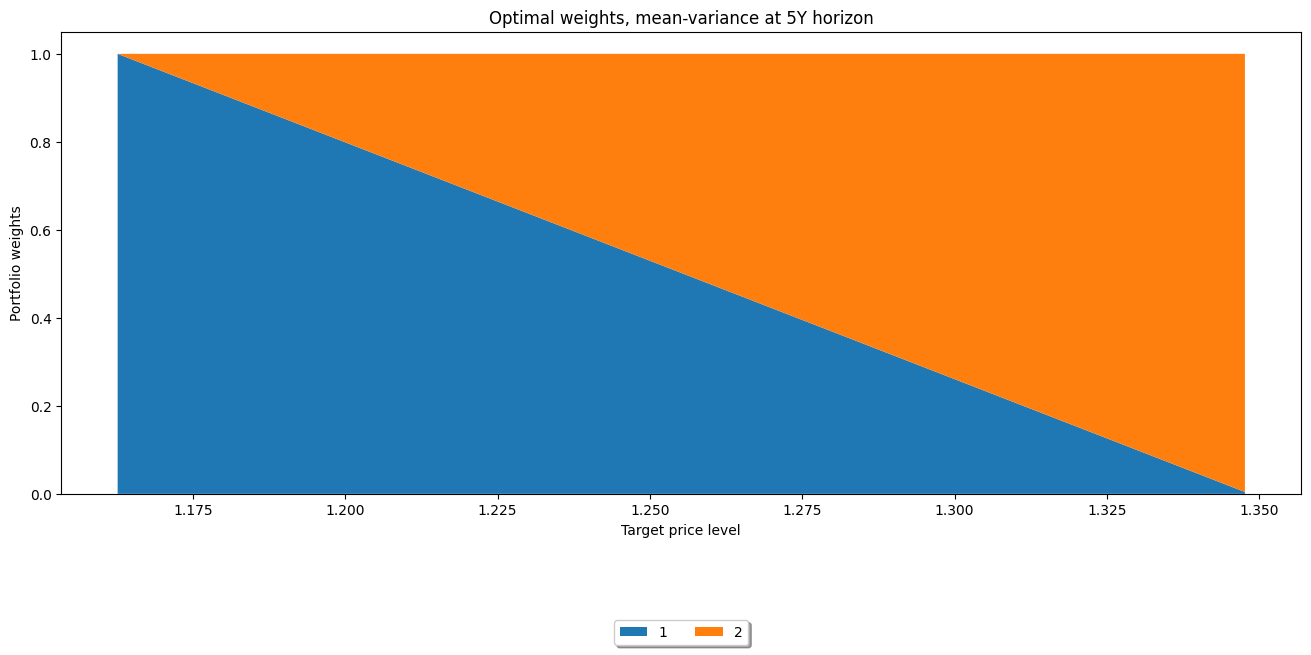

In [33]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.stackplot(target_returns, optimal_weights.T, labels=np.arange(1,3));
ax.set_xlabel("Target price level")
ax.set_ylabel("Portfolio weights")
ax.set_title("Optimal weights, mean-variance at 5Y horizon")
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5);

In [55]:
#1Y optimal weights, Buy-and-hold, target return = exp(0.05T)

#Define relevant constraints
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

bounds = [(0.0, 1.0)] * 2
target_returns = np.arange(1.030225, np.exp(0.05), 0.001) 

"""
Find optimal weights
"""

optimal_weights = list()
for target_return in target_returns:
    # define constraint 
    target_cons = {'type': 'eq',
                   'fun' : lambda x: np.average(prices_1y @ x) - target_return}


    x0 = np.ones(2) / 2
    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_1y,),
                                 method='SLSQP',
                                 constraints=[sum_to_one_cons, no_short_cons, target_cons], 
                                 options={'ftol': 1e-9, 'disp': True}, bounds=bounds)
    
    optimal_weights.append(res.x)
    
optimal_weights = np.array(optimal_weights)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.006046091529943795
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005660626508774004
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005348718951822924
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.005110415017664619
            Iterations: 2
            Function evaluations: 7
            Gradient evaluations: 2
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0049457147062982355
            Iterations: 2
            Func

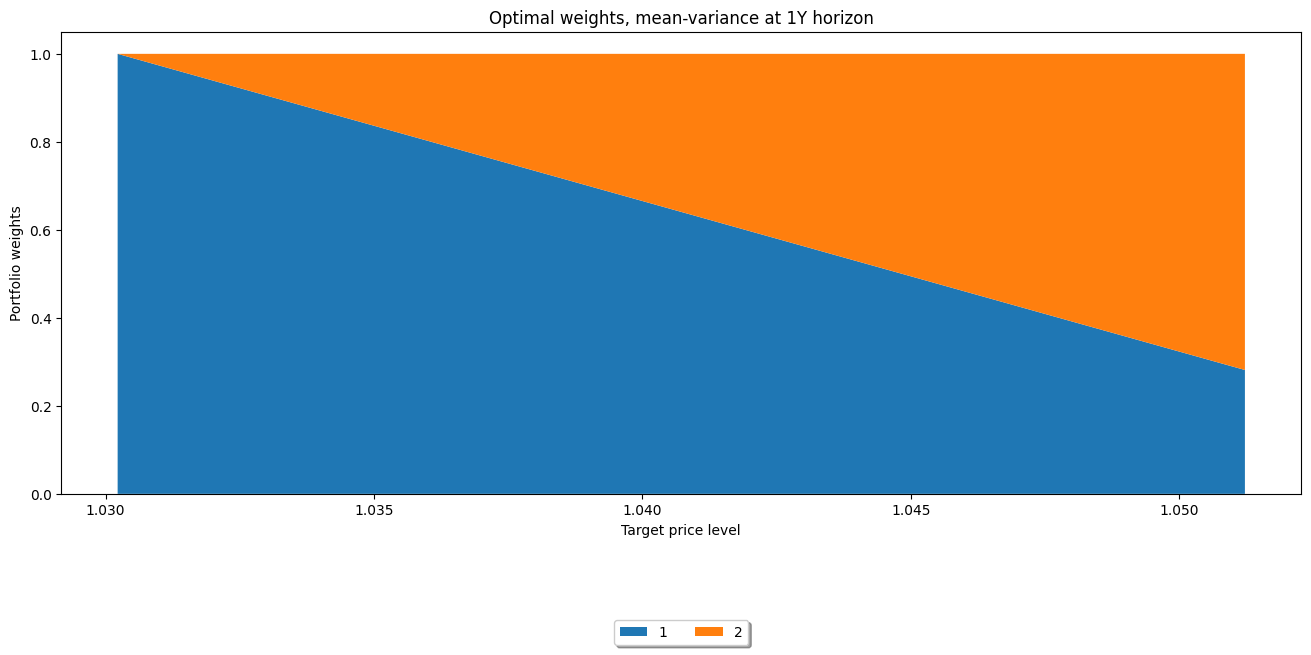

In [56]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.stackplot(target_returns, optimal_weights.T, labels=np.arange(1,3));
ax.set_xlabel("Target price level")
ax.set_ylabel("Portfolio weights")
ax.set_title("Optimal weights, mean-variance at 1Y horizon")
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5);

In [57]:
#5Y optimal weights, Buy-and-hold, target return = exp(0.05T)

"""
Define relevant constraints
"""
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

# alternatively use 
bounds = [(0.0, 1.0)] * 2

target_returns = np.arange(1.162630, np.exp(0.25), 0.001) 

"""
Find optimal weights
"""

optimal_weights = list()
for target_return in target_returns:
    # define constraint 
    target_cons = {'type': 'eq',
                   'fun' : lambda x: np.average(prices_5y @ x) - target_return}


    x0 = np.ones(2) / 2
    res = optimize.minimize(portfolio_variance, x0=x0, args=(cov_mat_5y,),
                                 method='SLSQP',
                                 constraints=[sum_to_one_cons, no_short_cons, target_cons], 
                                 options={'ftol': 1e-9, 'disp': True}, bounds=bounds)
    
    optimal_weights.append(res.x)
    
optimal_weights = np.array(optimal_weights)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.037501970650218146
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03709930280228084
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.036711419245535004
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03633831997998151
            Iterations: 3
            Function evaluations: 9
            Gradient evaluations: 3
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03598000500562033
            Iterations: 3
            Function evaluatio

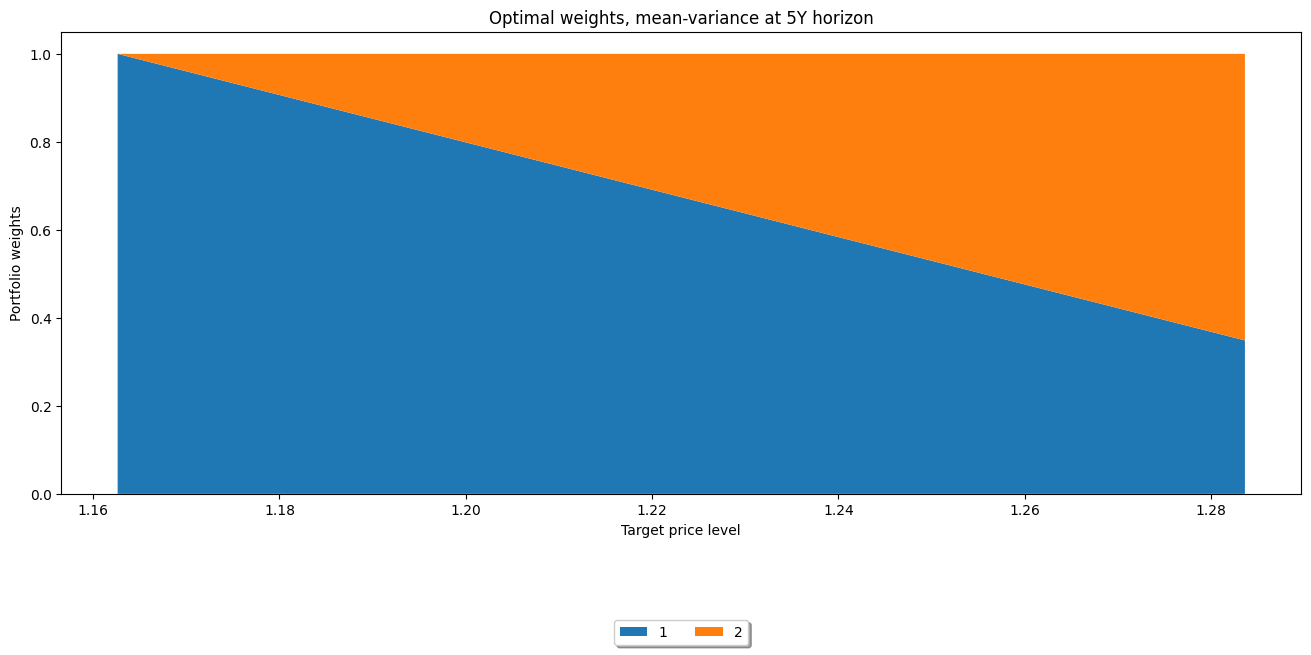

In [58]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.stackplot(target_returns, optimal_weights.T, labels=np.arange(1,3));
ax.set_xlabel("Target price level")
ax.set_ylabel("Portfolio weights")
ax.set_title("Optimal weights, mean-variance at 5Y horizon")
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5);

In [61]:
def calculate_variance(x: np.ndarray, probs: Union[np.ndarray, None] = None, axis=0) -> Union[float, np.ndarray]:

    """
    Calculates variance.

    Parameters
    ----------
    x:
        Data to calculate variance for.
    probs:
        Probabilities.
    axis:
        Axis over which to calculate.

    Returns
    -------
    Union[float, np.ndarray]
        Variance.

    """

    m = np.average(x, weights=probs, axis=axis)

    return np.average(np.square(x - m), weights=probs)

def constant_mix_variance(w, prices, probs=None):

    port_returns = calculate_constant_mix_index(prices, w)
    
    T = len(port_returns)
    
    obj_func = calculate_variance(port_returns[:, -1], probs=probs)

    return obj_func



In [66]:
#5Y Optimal Weights, Constant mix
"""
Define relevant constraints
"""
sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

# alternatively use 
bounds = [(0.0, 1.0)] * 2

target_returns = np.arange(1.162630, np.exp(0.25), 0.001) 

"""
Find optimal weights
"""

optimal_weights = list()
for target_return in target_returns:
    # define constraint 
    target_cons = {'type': 'eq',
                   'fun' : lambda x: np.average(calculate_constant_mix_index(prices, x)[:, -1]) - target_return}


    x0 = np.ones(2) / 2
    res = optimize.minimize(constant_mix_variance, x0=x0, args=(prices,),
                                 method='SLSQP',
                                 constraints=[sum_to_one_cons, no_short_cons, target_cons], 
                                 options={'ftol': 1e-9, 'disp': True}, bounds=bounds)
    
    optimal_weights.append(res.x)
    
optimal_weights = np.array(optimal_weights)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03749822495812296
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03711696755844526
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03674839606970277
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03639252919254117
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.03604938590290049
            Iterations: 4
            Function evaluat

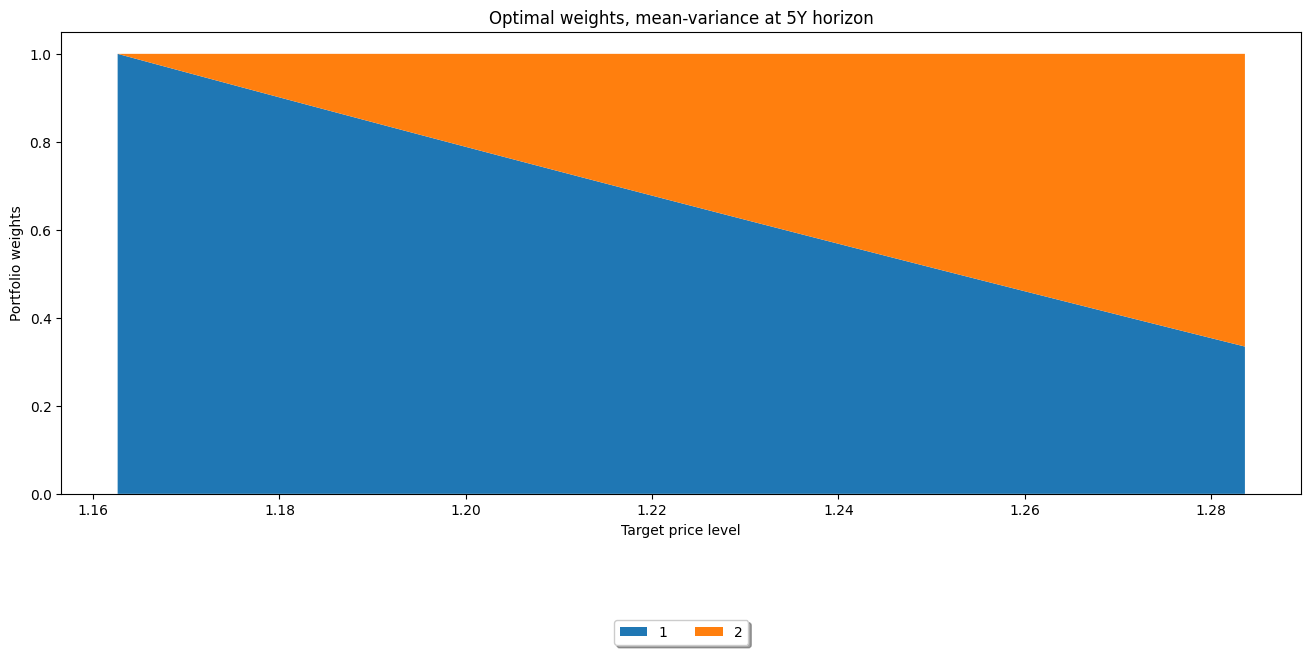

In [67]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.stackplot(target_returns, optimal_weights.T, labels=np.arange(1,3));
ax.set_xlabel("Target price level")
ax.set_ylabel("Portfolio weights")
ax.set_title("Optimal weights, mean-variance at 5Y horizon")
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=5);

Part 2 - Portfolio Insurance Strategies

In [8]:
# Functions

def simulate_gbm_paths(mu: float, sigma: float, capital_t: float, num_periods: int, num_sim: int, s_0: float = 1.0) -> List[List[float]]:
    dt = capital_t/num_periods
    s = np.exp((mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size=(num_sim, num_periods)).T)
    s = np.vstack([np.ones(num_sim), s])
    s = s_0 * s.cumprod(axis=0)
    return s.T.tolist()

def simulate_cir(initial_short_rate: float, kappa: float, theta: float, beta: float, horizon: float, 
                     dt: float=1.0/12, num_sim: int=10000):

    num_periods = int(horizon / dt)
    short_rates = np.empty((num_sim, num_periods + 1))
    short_rates[:, 0] = initial_short_rate
    
    error_terms = np.random.normal(size=(num_sim, num_periods))
    
    for i in range(1, num_periods + 1): 
        short_rates[:, i] = (short_rates[:, i - 1] + kappa * (theta - short_rates[:, i - 1]) * dt +
                             beta * np.sqrt(short_rates[:, i - 1]) * error_terms[:, i - 1] * np.sqrt(dt))

    return short_rates

def simulate_short_rate(kappa: float, theta: float, beta: float, num_periods: int, num_sim: int, r_0: float) -> List[List[float]]:
    r = [[r_0] * num_sim]
    for t in range(1, num_periods):
        mean = r_0*np.exp(-kappa*t)+theta*(1-np.exp(-kappa*t))
        var = beta**2/(2*kappa)*(1-np.exp(-2*kappa*t))
        short_rate = np.random.normal(mean, var, size=(num_sim)).T.tolist()
        r.append(short_rate)
    return np.array(r).T.tolist()

def simulate_bank_account(short_rate: List[List[float]], capital_t: float, num_periods: int, num_sim: int) -> List[List[float]]:
    bank_account = np.zeros((num_sim, 1 + num_periods))
    bank_account[:,1:] = np.cumsum(np.array(short_rate)*(capital_t/num_periods), axis=1)
    bank_account = np.exp(bank_account).tolist()
    return bank_account


def calculate_buy_and_hold(assets: np.ndarray, weights: np.ndarray) -> List[List[float]]:
    returns = assets @ weights
    return returns.tolist()

def calculate_period_returns(assets: np.ndarray) -> List[List[float]]:
    n = assets.shape[1]
    new_mat = assets[:, 1:n]
    old_mat = assets[:, 0:n-1]
    periodtr = new_mat / old_mat
    return (periodtr - 1).tolist()
    

def calculate_constant_mix(assets: np.ndarray, weights: np.ndarray) -> List[List[float]]: 
    port_index = np.ones((assets.shape[0], assets.shape[1]))
    per_ret = calculate_period_returns(assets)
    port_per_ret = per_ret @ weights
    port_index[:, 1:] = np.cumprod(1 + port_per_ret, axis=1)
    return port_index.tolist()

In [43]:
# Parameters

steps = 12  # 52 for weekly rebalance, 12 for yearly
capital_t = 5
dt = 1.0/12.0
num_periods = capital_t * steps+1
mu, sigma = 0.06, 0.15
r_0, kappa, theta, beta = 0.03, 1.0, 0.03, 0.02

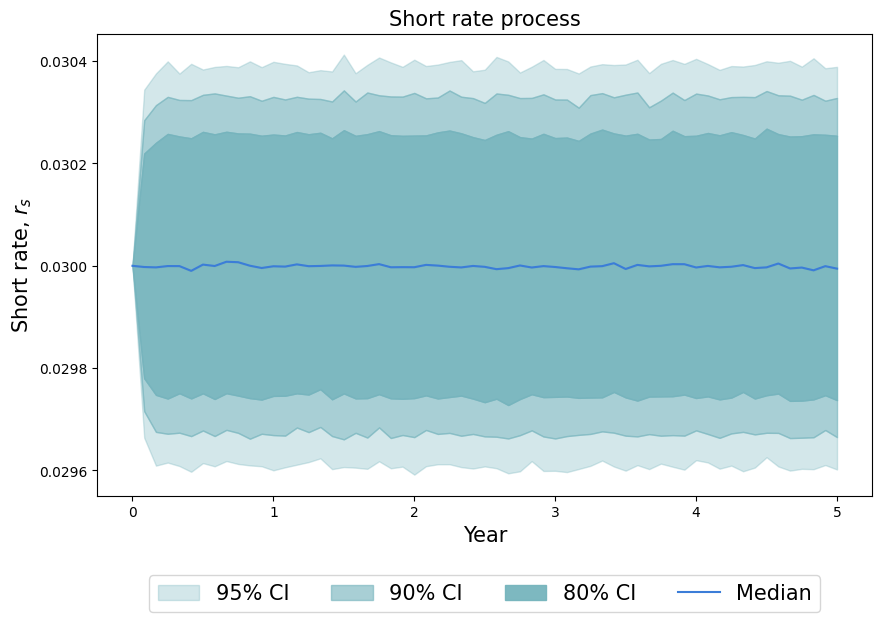

In [44]:
num_sim = 5000
short_rate = simulate_short_rate(kappa=kappa, theta=theta, beta=beta, num_periods=num_periods, num_sim=num_sim, r_0=r_0)
time_points = np.arange(0, 5.01, dt)

# calculate percentiles
percentiles = np.percentile(short_rate, [2.5, 5, 10, 50, 90, 95, 97.5], axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

fan_chart(time_points,
          percentiles,
          color=default_colors['cyan'],
          color_median=default_colors['dark_blue'],
          labels=['95% CI', '90% CI', '80% CI', 'Median'],
          ax=ax)

ax.set_xlabel("Year", size=15)
ax.set_ylabel("Short rate, $r_s$", size=15)
ax.set_title("Short rate process", size=15)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=15);

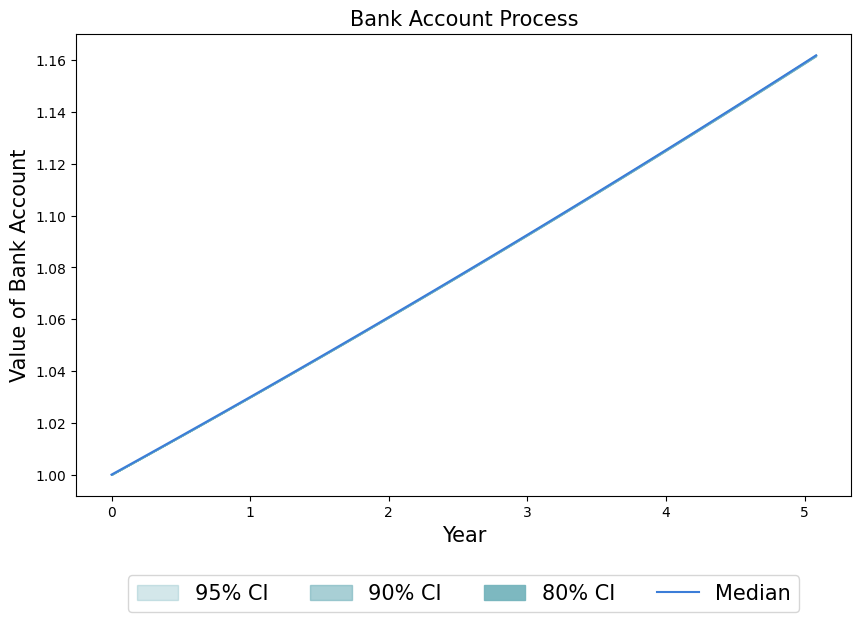

In [48]:

bank_account = simulate_bank_account(short_rate=short_rate, num_periods=num_periods, num_sim=num_sim, capital_t=capital_t)

time_points = np.arange(0, 5.10, dt)

# calculate percentiles
percentiles = np.percentile(bank_account, [2.5, 5, 10, 50, 90, 95, 97.5], axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

fan_chart(time_points,
          percentiles,
          color=default_colors['cyan'],
          color_median=default_colors['dark_blue'],
          labels=['95% CI', '90% CI', '80% CI', 'Median'],
          ax=ax)

ax.set_xlabel("Year", size=15)
ax.set_ylabel("Value of Bank Account", size=15)
ax.set_title("Bank Account Process", size=15)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=15);


In [49]:
risky_asset = simulate_gbm_paths(mu=mu, sigma=sigma, capital_t=capital_t, num_periods=num_periods, num_sim=num_sim)


In [50]:
#Define risky asset
risky_asset = simulate_gbm_paths(mu=mu, sigma=sigma, capital_t=capital_t, num_periods=num_periods, num_sim=num_sim)



#Combine the risky and risk-free asset
assets = np.dstack((risky_asset, bank_account))
# initial weights (0.5, 0.5)
weights = np.ones(assets.shape[2]) / assets.shape[2]

#Returns on buy and hold and constant mix pf
buy_and_hold = calculate_buy_and_hold(assets=assets, weights=weights)
constant_mix = calculate_constant_mix(assets=assets, weights=weights)

# W_5 for both strategies
final_buy_and_hold = [v[-1] for v in buy_and_hold]
final_constant_mix = [v[-1] for v in constant_mix]

np.mean(final_buy_and_hold)



1.255479127125426

In [14]:
np.mean(final_constant_mix)

1.2474347386543838

In [51]:
#Defining optimization problem
def crra(w: float, gamma: float = 2.0) -> float:
    return w**(1 - gamma)/(1 - gamma)

def objective_function(x, assets: List[List[float]], strategy: Callable) -> float:
    result = strategy(assets, x)
    terminal_value = np.mean([v[-1] for v in result])
    utility = crra(w=terminal_value)
    return -utility

sum_to_one_cons = {'type': 'eq',
                   'fun' : lambda x: np.sum(x) - 1.0}

no_short_cons = {'type': 'ineq',
                 'fun' : lambda x: x}

In [16]:
# Optimizing, assuming no short constraint

w_constant_mix = optimize.minimize(objective_function, x0=weights, args=(assets, calculate_buy_and_hold), method='SLSQP',constraints=[sum_to_one_cons, no_short_cons], options={'ftol': 1e-9, 'disp': True})
w_buy_and_hold = optimize.minimize(objective_function, x0=weights, args=(assets, calculate_buy_and_hold), method='SLSQP',constraints=[sum_to_one_cons, no_short_cons], options={'ftol': 1e-9, 'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7459588761371551
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7459588761371551
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


In [52]:
# Function for finding Constant Proportion Portfolio insurance strategy

def const_prop_port(m: float, cushion: float, b: float, wealth: float, value: float) -> Tuple[float, float]:
    weight = min(m*cushion, b*wealth)/value
    if weight > 1:
        weight = 1
    if weight < 0:
        weight = 0
    return weight, 1-weight

def cushion(wealth: float, c: float, value: float) -> float:
    return wealth - c * value

In [53]:
# Parameters
m, b, c = 5, 1.0, 0.7  # c is marked as 0.7 since i assume initial wealth of 1 instead of 1.000.000, m = 2,5 or 5

In [54]:
# Calculations returns for the new weights

res = []
for v_1, v_2 in zip(risky_asset, bank_account):
    res_path, w_1_t, w_2_t = [], 0.5, 0.5
    for v_1_t, v_2_t in zip(v_1, v_2):
        wealth_t = w_1_t * v_1_t + w_2_t * v_2_t
        cushion_t = cushion(wealth=wealth_t, c=c, value=v_2_t)
        w_1_t, w_2_t = const_prop_port(m=m, cushion=cushion_t, b=b, wealth=wealth_t, value=v_1_t)
        res_path.append(wealth_t)
    res.append(res_path)

In [55]:
final_new_strag = [v[-1] for v in res]
np.mean(final_new_strag)

1.3775596926331892

In [56]:
#New minimum wealth restriction

def minumum_wealth(x, assets: np.ndarray, c: float, strategy: Callable) -> float:
    result = strategy(assets, x)
    wealth = np.mean([v[-1] for v in result])
    terminal_bank = np.mean([v[-1] for v in assets[:,:,1]])
    return wealth - c * terminal_bank

minimum_wealth_constant_mix = {'type': 'ineq',
                       'fun' : lambda x: minumum_wealth(x, assets=assets, c=c, strategy=calculate_constant_mix)}
minimum_wealth_buy_and_hold = {'type': 'ineq',
                       'fun' : lambda x: minumum_wealth(x, assets=assets, c=c, strategy=calculate_buy_and_hold)}



In [57]:
#New weights

res_constant_mix = optimize.minimize(objective_function, x0=weights, args=(assets, calculate_buy_and_hold), method='SLSQP',constraints=[sum_to_one_cons, no_short_cons, minimum_wealth_constant_mix], options={'ftol': 1e-9, 'disp': True})
res_buy_and_hold = optimize.minimize(objective_function, x0=weights, args=(assets, calculate_buy_and_hold), method='SLSQP',constraints=[sum_to_one_cons, no_short_cons, minimum_wealth_buy_and_hold], options={'ftol': 1e-9, 'disp': True})

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7412192108772832
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7412192108772832
            Iterations: 4
            Function evaluations: 12
            Gradient evaluations: 4


Zero Coupon Yield:

In [58]:
#Define functions for yield, ZCP and tau

def yield_t(tau: float, r_t: float, theta: float, beta: float, kappa: float, lambd: float = -0.2) -> float:
    y = theta - lambd * beta / kappa - beta**2 / (2*kappa**2)
    b = (1 / kappa) * (1 - np.exp(-kappa * tau))
    a = y * (tau - b) + beta**2 / (4 * kappa) * b**2
    return (1 / tau) * (a + b * r_t)

def zcpn(r_t: float, t: float, cap_t: float, theta: float, beta: float, kappa: float, step_size: float) -> float:
    b = (1 - np.exp(-kappa * (cap_t - t * step_size))) / kappa
    a = (theta - beta**2 / (2*kappa**2)) * (b - (cap_t - t * step_size)) - beta**2 / (4 * kappa) * b**2
    return np.exp(a - b * r_t)

step_size = capital_t / num_periods
taus, tau = [], 0
for i in range(num_periods):
    tau += step_size
    taus.append(tau)

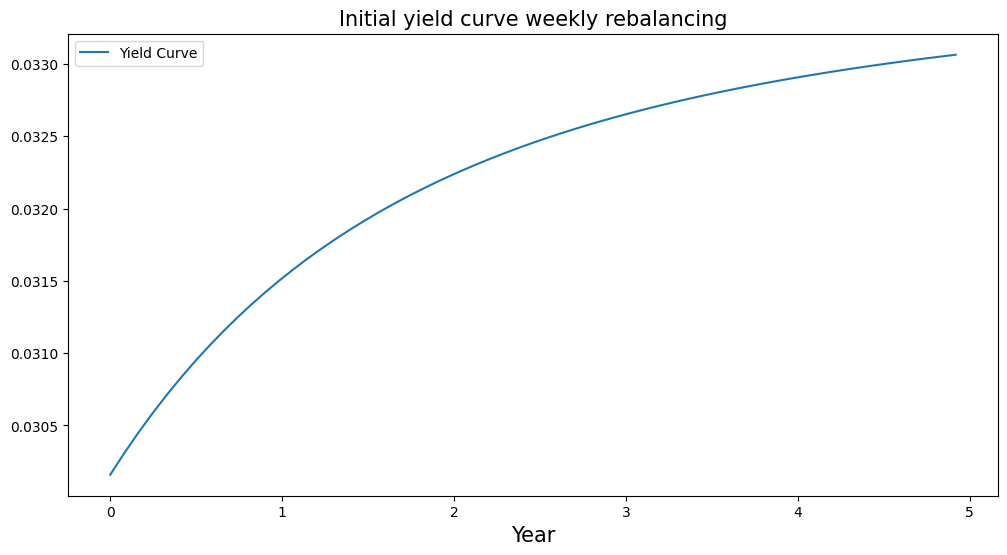

In [62]:
#Initial yield: 
initial_yield = [yield_t(tau, r_t=r_0, theta=theta, beta=beta, kappa=kappa) for tau in taus]

time_points = np.arange(0, 4.95, step_size)

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(time_points,initial_yield, label="Yield Curve")
ax.set_title("Initial yield curve weekly rebalancing", size=15)
ax.set_xlabel("Year",size=15)
ax.legend()

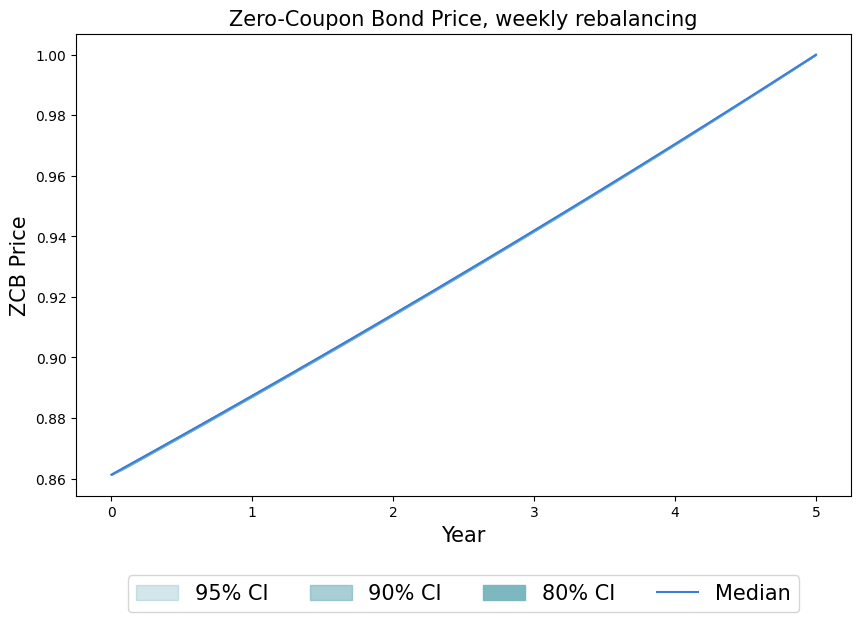

In [63]:
#ZCBP

zcpn_prices = []
for path in short_rate:
    prices = []
    for t, rate in enumerate(path):
        price = zcpn(r_t=rate, t=t, cap_t=capital_t, theta=theta, kappa=kappa, beta=beta, step_size=step_size)
        prices.append(price)
    prices.append(1)
    zcpn_prices.append(prices)

time_points = np.arange(0, 5.01, step_size)

percentiles = np.percentile(zcpn_prices,[2.5, 5, 10, 50, 90, 95, 97.75],axis=0)

fig, ax = plt.subplots(figsize=(10, 6))

fan_chart(time_points,
          percentiles,
          color=default_colors['cyan'],
          color_median=default_colors['dark_blue'],
          labels=['95% CI', '90% CI', '80% CI', 'Median'],
          ax=ax)

ax.set_xlabel("Year", size=15)
ax.set_ylabel("ZCB Price", size=15)
ax.set_title("Zero-Coupon Bond Price, weekly rebalancing", size=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=15);

In [64]:
#New Strategy

new_assets = assets = np.dstack((risky_asset, zcpn_prices))
period_returns = calculate_period_returns(assets=new_assets)
returns_risky = np.array(period_returns)[:,:,0].tolist()
returns_zcpn = np.array(period_returns)[:,:,1].tolist()

c = 0.8

res = []
for v_1, v_2, r_1, r_2 in zip([x[1:] for x in risky_asset], [x[1:] for x in bank_account], returns_risky, returns_zcpn):
    res_path, wealth_t = [], 1
    cushion_t = cushion(wealth=1, c=c, value=1)
    w_1_t, w_2_t = const_prop_port(m=m, cushion=cushion_t, b=b, wealth=1, value=1)  
    for v_1_t, v_2_t, r_1_t, r_2_t in zip(v_1, v_2, r_1, r_2):
        wealth_t = wealth_t * (1 + (w_1_t * r_1_t + w_2_t * r_2_t))
        cushion_t = cushion(wealth=wealth_t, c=c, value=v_2_t)
        w_1_t, w_2_t = const_prop_port(m=m, cushion=cushion_t, b=b, wealth=wealth_t, value=v_1_t)
        res_path.append(wealth_t)
    res.append(res_path)

In [65]:
final_new_strag = [v[-1] for v in res]
np.mean(final_new_strag)

1.3016044635709565